## Simulate visibilities

Loads global sky model via pygdsm, then simulates visibilities.

In [1]:
import pylab as plt
from astropy.constants import c

from ska_ost_low_uv.io import hdf5_to_uvx
from ska_ost_low_uv.postx import ApertureArray
from ska_ost_low_uv.postx.imaging import instrumental_to_stokes
from ska_ost_low_uv.postx.simulation.gsm_sim import simulate_visibilities_gsm
from ska_ost_low_uv.utils import get_test_data

SPEED_OF_LIGHT = c.value

uvx = hdf5_to_uvx(get_test_data('s8-6/correlation_burst_204_20240701_65074_0.hdf5'), telescope_name='s8-6')
aa = ApertureArray(uvx)

2025-09-08 08:59:20.059 | INFO     | ska_ost_low_uv.io.metadata:load_observation_metadata:68 - Using internal config s8-6
2025-09-08 08:59:20.554 | INFO     | ska_ost_low_uv.datamodel.uvx:create_visibility_array:265 - Conjugating data
2025-09-08 08:59:20.556 | INFO     | ska_ost_low_uv.datamodel.uvx:create_visibility_array:269 - Transposing data
2025-09-08 08:59:20.559 | WARNING  | ska_ost_low_uv.io.to_uvx:hdf5_to_uvx:168 - Could not find expected keys in observation_info
2025-09-08 08:59:20.559 | WARNING  | ska_ost_low_uv.io.to_uvx:hdf5_to_uvx:170 - <KeysViewHDF5 []>


In [ ]:
V = simulate_visibilities_gsm(aa)
V = aa.simulation.sim_vis_gsm()

### Make healpix images

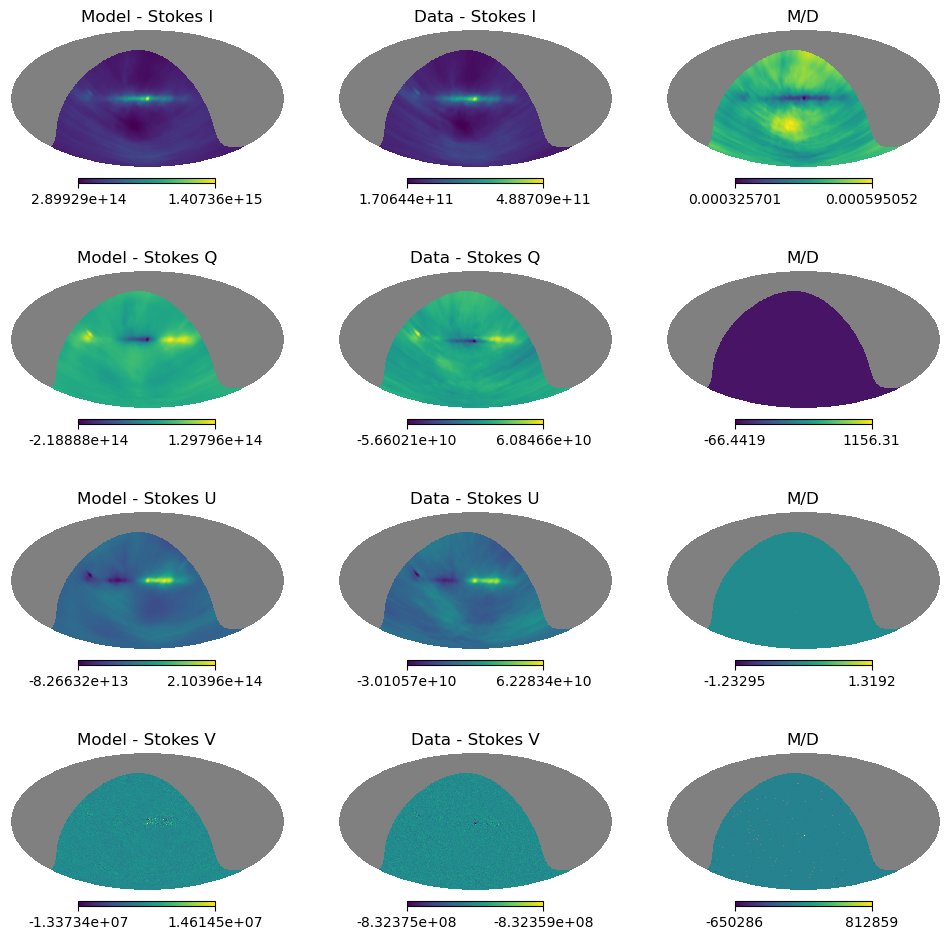

In [ ]:
aa.workspace['vis'] = {'corrected': V}
hpx = aa.imaging.make_healpix(vis='model')
hpx_d = aa.imaging.make_healpix(vis='data')

hpx = instrumental_to_stokes(hpx)
hpx_d = instrumental_to_stokes(hpx_d)

pols = ('I', 'Q', 'U', 'V')

plt.figure(figsize=(12, 12))
for p in range(4):
    kwargs = {'hold': True, 'overlay_grid': False, 'notext': True}

    plt.subplot(4, 3, 1 + 3 * p)
    aa.viewer.mollview(hpx, pol_idx=p, title=f'Model - Stokes {pols[p]}', **kwargs)
    plt.subplot(4, 3, 2 + 3 * p)
    aa.viewer.mollview(hpx_d, pol_idx=p, title=f'Data - Stokes {pols[p]}', **kwargs)
    plt.subplot(4, 3, 3 + 3 * p)
    aa.viewer.mollview(hpx_d / hpx, pol_idx=p, title='M/D', **kwargs)

### Make 2D orthographic images

/var/folders/75/zp4tsc4j0h5d3x9y1kyhj8l8s06wq3/T/ipykernel_60504/2487712204.py:17: RuntimeWarning: divide by zero encountered in divide
  aa.viewer.orthview(img_d / img, pol_idx=p, title='M/D', subplot_id=(4,3,3 + 3*p),  **kwargs, )


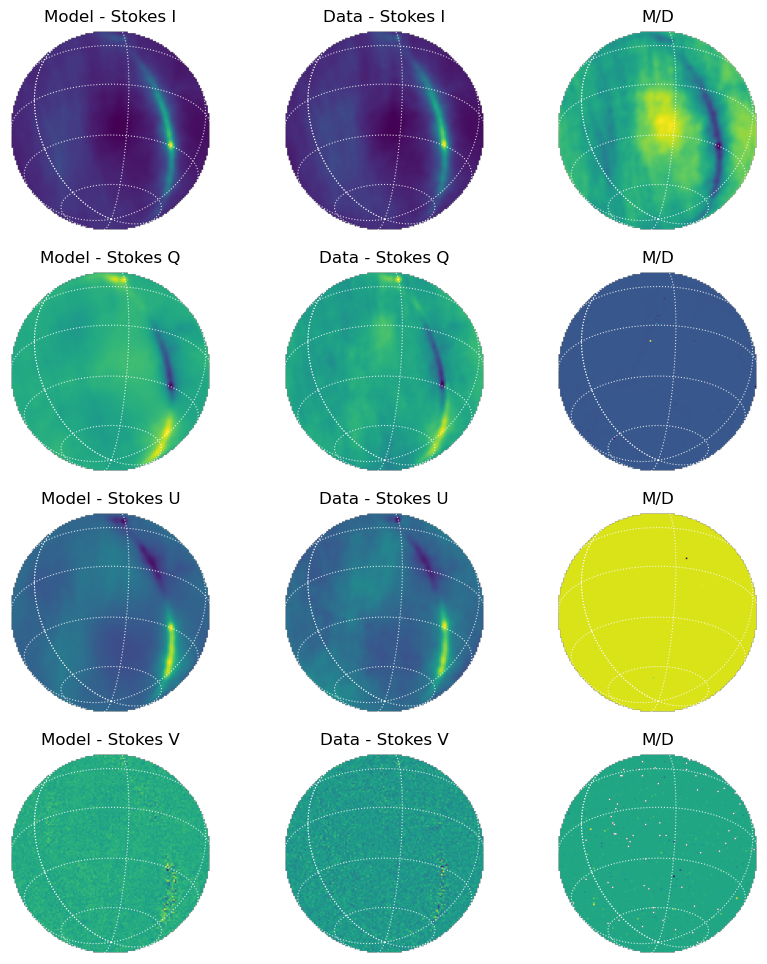

In [26]:
aa.workspace['vis'] = {'corrected': V}
img = aa.imaging.make_image(vis='model')
img_d = aa.imaging.make_image(vis='data')

img = instrumental_to_stokes(img)
img_d = instrumental_to_stokes(img_d)

pols = ('I', 'Q', 'U', 'V')

plt.figure(figsize=(10, 12))

for p in range(4):
    kwargs = {'reuse_fig': True}

    aa.viewer.orthview(
        img, pol_idx=p, title=f'Model - Stokes {pols[p]}', subplot_id=(4, 3, 1 + 3 * p), **kwargs
    )
    aa.viewer.orthview(
        img_d, pol_idx=p, title=f'Data - Stokes {pols[p]}', subplot_id=(4, 3, 2 + 3 * p), **kwargs
    )
    aa.viewer.orthview(
        img_d / img,
        pol_idx=p,
        title='M/D',
        subplot_id=(4, 3, 3 + 3 * p),
        **kwargs,
    )